# Inspecting the First Results

In [70]:
# imports
import numpy as np

import pandas

import seaborn as sns
from matplotlib import pyplot as plt

from frb.surveys import catalog_utils

# Load em up

## Path

In [53]:
ftry = pandas.read_csv('first_try.csv', index_col=0)
ftry.iFRB = ftry.iFRB.values.astype(int)
ftry.head()

,ra,dec,ang_size,mag,P_O,p_xO,P_Ox,P_Ux,gal_ID,iFRB
0,149.778723,2.574476,0.981993,20.823986,0.038314,0.000442,0.413031,0.169244,41077,0
1,149.777524,2.576435,0.412795,22.843554,0.006019,0.002026,0.297228,0.169244,41084,0
2,149.777955,2.567251,0.311627,21.377703,0.022539,0.000149,0.081925,0.169244,41075,0
3,149.778309,2.568582,0.842794,23.003826,0.005249,0.000187,0.023906,0.169244,41072,0
4,149.775524,2.565468,0.686807,21.988901,0.012806,0.000044,0.013701,0.169244,41085,0


In [54]:
np.unique(ftry.iFRB)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

## COSMOS

In [8]:
cosmos = pandas.read_feather('cosmos_acs_iphot_200709.feather')

In [9]:
cosmos.head()

,index,mag_best,flux_radius,a_image,kron_radius,petro_radius,b_image,theta_image,ra,dec,class_star,mu_class
0,0,24.438337,9.132363,6.947580,5.117546,7.259999,2.786127,38.172997,149.495975,2.499467,0.000160,1
1,1,23.857700,7.268479,4.176589,5.808434,10.560000,3.628767,40.507656,149.494352,2.490427,0.019758,1
2,2,23.705057,5.845803,4.461428,4.764295,7.259999,4.049543,-21.322527,149.494902,2.494936,0.281359,1
3,3,24.558876,4.736801,3.580482,4.755221,7.259999,2.802779,-59.909485,149.493794,2.493801,0.087045,1
4,5,23.348310,12.886220,11.909766,4.670296,6.599999,3.266122,16.987158,149.491495,2.493014,0.000417,1


## FRBs

In [95]:
frbs = pandas.read_csv('frb_monte_carlo.csv')
frbs.head()

,ra,dec,gal_ID,gal_off,loc_off
0,149.776857,2.575833,34519,0.083778,18.608427
1,150.363021,2.031332,838785,-0.067444,24.033023
2,150.162163,1.991247,82230,0.003642,1.194143
3,150.121823,2.680205,84291,0.031814,21.288107
4,150.279517,1.904798,101272,-0.082825,1.050939


# Test one

In [58]:
best_i = np.argmax(ftry.P_Ox)
best = ftry.iloc[best_i]
best

ra             150.279433
dec              1.904504
ang_size         4.451886
mag             16.490265
P_O              0.790420
p_xO             0.000699
P_Ox             0.987528
P_Ux             0.012407
gal_ID      101272.000000
iFRB             4.000000
Name: 168, dtype: float64

In [38]:
type(best)

pandas.core.series.Series

## Check the galaxy

In [22]:
c_idx = np.where(cosmos.index == ftry.index[best_i])[0][0]
c_idx

101272

## Check the FRB

In [69]:
frbs.loc[int(best.iFRB)]

ra            150.279517
dec             1.904798
gal_ID     101272.000000
gal_off        -0.082825
loc_off         1.050939
Name: 4, dtype: float64

In [64]:
frbs.loc[ftry.loc[best_i, 'iFRB'], 'gal_ID']

101272

## And so?

In [68]:
assert frbs.loc[ftry.loc[best_i, 'iFRB'], 'gal_ID'] == ftry.loc[best_i, 'gal_ID']

----

# Check em all

## Add mags

In [71]:
mt = catalog_utils.match_ids(frbs.gal_ID.values, cosmos.index)

In [98]:
frbs['mag'] = cosmos.iloc[mt]['mag_best'].values

In [81]:
frbs.head()

,ra,dec,gal_ID,gal_off,loc_off,mag
0,149.776857,2.575833,34519,0.083778,18.608427,23.868221
1,150.363021,2.031332,838785,-0.067444,24.033023,24.940214
2,150.162163,1.991247,82230,0.003642,1.194143,16.266012
3,150.121823,2.680205,84291,0.031814,21.288107,22.105904
4,150.279517,1.904798,101272,-0.082825,1.050939,16.490265


## Loop me

In [87]:
iFRB = 1
ftry[ftry.iFRB == iFRB].iloc[0].P_Ox

0.7542372832526735

In [88]:
POxs = [np.nan]*len(frbs)
IDs = [-1]*len(frbs)

In [89]:
for iFRB in np.unique(ftry.iFRB.values):
    best_cand = ftry[ftry.iFRB == iFRB].iloc[0] 
    # Save
    POxs[iFRB] = best_cand.P_Ox
    IDs[iFRB] = int(best_cand.gal_ID)    

In [96]:
frbs['P_Ox'] = POxs
frbs['PATH_ID'] = IDs

In [99]:
frbs.head()

,ra,dec,gal_ID,gal_off,loc_off,P_Ox,PATH_ID,mag
0,149.776857,2.575833,34519,0.083778,18.608427,0.413031,41077,23.868221
1,150.363021,2.031332,838785,-0.067444,24.033023,0.754237,111025,24.940214
2,150.162163,1.991247,82230,0.003642,1.194143,0.985191,82230,16.266012
3,150.121823,2.680205,84291,0.031814,21.288107,0.700318,77580,22.105904
4,150.279517,1.904798,101272,-0.082825,1.050939,0.987528,101272,16.490265


## Inspect

<Axes: xlabel='mag', ylabel='P_Ox'>

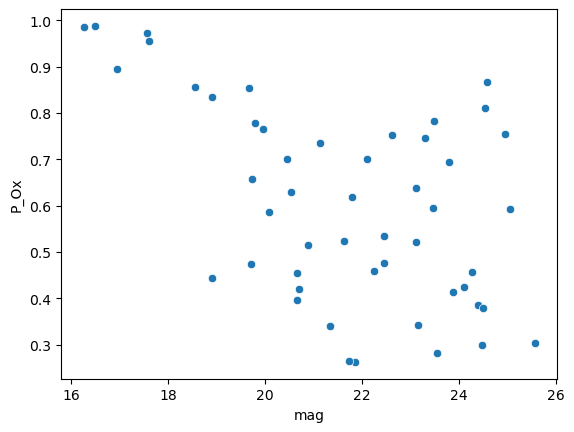

In [100]:
sns.scatterplot(frbs, x='mag', y='P_Ox')

## High confidence

In [101]:
high = frbs.P_Ox > 0.9

In [102]:
frbs[high]

,ra,dec,gal_ID,gal_off,loc_off,P_Ox,PATH_ID,mag
2,150.162163,1.991247,82230,0.003642,1.194143,0.985191,82230,16.266012
4,150.279517,1.904798,101272,-0.082825,1.050939,0.987528,101272,16.490265
9,149.482236,2.436033,5214,0.035496,3.306093,0.954176,5214,17.608921
18,149.567196,2.405730,11023,0.062198,3.752479,0.973322,11023,17.564672
